In [1]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
import os
import shutil

In [2]:
def process_one_zip(zip_name, zip_dir, extract_dir='/content/unzipped_temp'):
    """
    Extracts a single ZIP file from any local folder, processes inner ZIPs and CSVs, and returns a DataFrame.
    
    Parameters:
    - zip_name: filename of the ZIP, e.g., 'bicycle_volume_speed_2015.zip'
    - zip_dir: path to the folder where the ZIP file is stored
    - extract_dir: temporary directory for extraction (default is '/content/unzipped_temp')
    """
    outer_zip_path = os.path.join(zip_dir, zip_name)

    # Clean up previous temp extraction
    if os.path.exists(extract_dir):
        shutil.rmtree(extract_dir)
    os.makedirs(extract_dir, exist_ok=True)

    # Extract outer ZIP
    try:
        with zipfile.ZipFile(outer_zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f" Extracted outer ZIP: {zip_name}")
    except zipfile.BadZipFile:
        print(f" Bad ZIP file: {zip_name}")
        return None

    # Extract inner ZIPs
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            if file.lower().endswith(".zip"):
                inner_zip_path = os.path.join(root, file)
                inner_extract_path = os.path.join(root, os.path.splitext(file)[0])
                os.makedirs(inner_extract_path, exist_ok=True)
                try:
                    with zipfile.ZipFile(inner_zip_path, 'r') as zip_ref:
                        zip_ref.extractall(inner_extract_path)
                except zipfile.BadZipFile:
                    print(f" Skipping corrupted ZIP: {inner_zip_path}")

    # Read CSVs
    zip_df_list = []
    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            if file.lower().endswith(".csv"):
                csv_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(csv_path)
                    df['source_file'] = file
                    zip_df_list.append(df)
                except Exception as e:
                    print(f" Failed to read {csv_path}: {e}")

    if zip_df_list:
        combined_df = pd.concat(zip_df_list, ignore_index=True)
        print(f" Combined CSVs from {zip_name} — shape: {combined_df.shape}")
        return combined_df
    else:
        print(f" No CSV files found in {zip_name}")
        return None

In [37]:
bicycle_count_2022 = process_one_zip('bicycle_volume_speed_2022.zip', zip_dir='.')
bicycle_count_2022.head()

 Extracted outer ZIP: bicycle_volume_speed_2022.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_44284\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2022.zip — shape: (8638358, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,10223,59444,27/12/2021,04:48:42,15,1,16.0,1.0,297.7,297.8,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20220103.csv
1,IND,208,10223,59443,27/12/2021,05:25:27,15,0,37.4,1.0,2503.1,2503.1,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv
2,IND,208,10223,59443,27/12/2021,05:40:44,15,0,35.6,1.0,917.4,917.3,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv
3,IND,208,10223,59443,27/12/2021,05:40:45,15,0,36.3,1.0,0.6,0.5,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv
4,IND,208,10223,59443,27/12/2021,05:40:47,15,0,34.9,1.0,2.0,2.0,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20220103.csv


In [3]:
bicycle_count_2023 = process_one_zip('bicycle_volume_speed_2023.zip', zip_dir='.')
bicycle_count_2023.head()

 Extracted outer ZIP: bicycle_volume_speed_2023.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_44284\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2023.zip — shape: (10467615, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,10223,59443,26/12/2022,04:58:18,15,0,17.3,1.1,44.7,44.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv
1,IND,208,10223,59443,26/12/2022,05:42:26,15,0,26.9,1.0,2648.2,2648.0,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv
2,IND,208,10223,59444,26/12/2022,05:45:13,15,1,19.3,1.0,2860.2,2860.3,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20230102.csv
3,IND,208,10223,59443,26/12/2022,05:49:07,15,0,25.9,1.1,157.9,157.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv
4,IND,208,10223,59443,26/12/2022,05:52:19,15,0,21.7,1.1,192.2,192.1,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20230102.csv


In [4]:
bicycle_count_2024 = process_one_zip('bicycle_volume_speed_2024.zip', zip_dir='.')
bicycle_count_2024.head()

 Extracted outer ZIP: bicycle_volume_speed_2024.zip


C:\Users\PCs\AppData\Local\Temp\ipykernel_44284\76526138.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(zip_df_list, ignore_index=True)


 Combined CSVs from bicycle_volume_speed_2024.zip — shape: (5549004, 18)


,DATA_TYPE,TIS_DATA_REQUEST,SITE_XN_ROUTE,LOC_LEG,DATE,TIME,CLASS,LANE,SPEED,WHEELBASE,HEADWAY,GAP,AXLE,AXLE_GROUPING,RHO,VEHICLE,DIRECTION,source_file
0,IND,208,10223,59443,25/12/2023,05:21:45,15,0,25.3,1.1,967.7,967.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20240101.csv
1,IND,208,10223,59444,25/12/2023,05:41:27,15,1,11.8,1.1,2150.6,2150.7,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20240101.csv
2,IND,208,10223,59443,25/12/2023,05:56:58,15,0,24.1,1.1,2113.8,2113.6,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20240101.csv
3,IND,208,10223,59444,25/12/2023,06:12:05,15,1,13.7,1.1,1837.9,1837.5,2,1,1.0,CYCLE,S,IND_D208_X10223_NS0_20240101.csv
4,IND,208,10223,59443,25/12/2023,06:37:31,15,0,25.5,1.1,1285.7,1285.7,2,1,1.0,CYCLE,N,IND_D208_X10223_NS0_20240101.csv


In [21]:
air_quality_2022 = pd.read_excel("2022_air_quality.xlsx")
air_quality_2022.head()

,datetime_AEST,datetime_local,location_id,location_name,latitude,longitude,value,validation_flag,parameter_name,parameter_method_name
0,2021-12-31 23:00:00,2022-01-01 00:00:00,10136,Mooroolbark,-37.774967,145.328500,49.150,Y,PM10,PM10
1,2021-12-31 23:00:00,2022-01-01 00:00:00,10011,Traralgon,-38.194282,146.531464,27.504,Y,PM10,PM10
2,2021-12-31 23:00:00,2022-01-01 00:00:00,10451,Footscray,-37.803709,144.869342,33.061,Y,PM10,PM10
3,2021-12-31 23:00:00,2022-01-01 00:00:00,10017,Morwell East,-38.229393,146.424454,3.327,Y,PM2.5,BPM2.5
4,2021-12-31 23:00:00,2022-01-01 00:00:00,10107,Geelong South,-38.173560,144.370300,10.129,Y,PM2.5,BPM2.5


In [22]:
air_quality_2023 = pd.read_excel("2023_air_quality.xlsx")
air_quality_2023.head()

,datetime_AEST,datetime_local,location_id,location_name,latitude,longitude,value,validation_flag,parameter_name,parameter_method_name
0,2022-12-31 23:00:00,2023-01-01 00:00:00,10136,Mooroolbark,-37.774967,145.328500,10.000,Y,PM10,PM10
1,2022-12-31 23:00:00,2023-01-01 00:00:00,10451,Footscray,-37.803709,144.869342,13.293,Y,PM10,PM10
2,2022-12-31 23:00:00,2023-01-01 00:00:00,10011,Traralgon,-38.194282,146.531464,12.975,Y,PM2.5,SBPM25
3,2022-12-31 23:00:00,2023-01-01 00:00:00,10107,Geelong South,-38.173560,144.370300,6.532,Y,PM2.5,SBPM25
4,2022-12-31 23:00:00,2023-01-01 00:00:00,10001,Alphington,-37.778408,145.030600,8.163,Y,PM10,PM10


In [14]:
# Path to your CSV file
file_path = "Pedestrian_Counting_System_Monthly_counts_per_hour_2009_2022.csv"

# Set chunk size (adjust based on your RAM)
chunk_size = 100_000

# Prepare an empty list to hold filtered chunks
filtered_chunks = []

# Read and filter chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    filtered_chunk = chunk[chunk['Year'] == 2022]
    filtered_chunks.append(filtered_chunk)

# Combine all filtered rows
pedestrian_count_2022 = pd.concat(filtered_chunks, ignore_index=True)
pedestrian_count_2022.head()

In [9]:
def collect_data(dataset_id):
  base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
  dataset_id = dataset_id
  format = "csv"

  url = f'{base_url}{dataset_id}/exports/{format}'
  params = {
      'select': '*',
      'limit': -1,
      'lang': 'en',
      'timezone': 'UTC'
  }

  response = requests.get(url, params = params)

  if response.status_code == 200:
    url_content = response.content.decode('utf-8')
    dataset = pd.read_csv(StringIO(url_content), delimiter = ';')
    return dataset
  else:
    print(f'Request failed with status code {response.status_code}')

In [10]:
dataset_id = "pedestrian-counting-system-monthly-counts-per-hour"
pedestrian_count_2023_2025 = collect_data(dataset_id)
print(f'The dataset contains {len(pedestrian_count_2023_2025)} records.')

pedestrian_count_2023_2025.head()

The dataset contains 1387730 records.


,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,72420250407,72,2025-04-07,4,1,3,4,ACMI_T,"-37.81726338, 144.96872809"
1,1420240312,1,2024-03-12,4,8,2,10,Bou292_T,"-37.81349441, 144.96515323"
2,76720250723,76,2025-07-23,7,25,22,47,KenMac_T,"-37.79453803, 144.93036194"
3,101320250611,10,2025-06-11,13,201,111,312,BouHbr_T,"-37.81876474, 144.94710545"
4,351920241105,35,2024-11-05,19,1184,1647,2831,SouthB_T,"-37.82018685, 144.96508508"


In [11]:
dataset_id = "bicycle-network"
bicycle_network = collect_data(dataset_id)
print(f'The dataset contains {len(bicycle_network)} records.')

bicycle_network.head()

The dataset contains 130048 records.


,geo_point_2d,geo_shape,objectid,roadclass,width,oneway,management,direction,shape_length,description
0,"-37.799073451599995, 144.93118404125","{""coordinates"": [[144.9311785744, -37.79908975...",74,91.0,0.0,NaN,Connector,B,3.745864,Entrance connecctor
1,"-37.8121545244, 144.96053695175","{""coordinates"": [[144.960520768, -37.812159159...",85,91.0,0.0,NaN,Connector,B,3.030180,Entrance connecctor
2,"-37.79756635265, 144.96663793525","{""coordinates"": [[144.9666363952, -37.79757515...",92,91.0,0.0,NaN,Connector,B,1.972702,Entrance connecctor
3,"-37.794943581249996, 144.9745210616","{""coordinates"": [[144.9745177654, -37.79496102...",93,91.0,0.0,NaN,Connector,B,3.914924,Entrance connecctor
4,"-37.819230844749995, 144.96168858775","{""coordinates"": [[144.9617312056, -37.81932301...",126,91.0,0.0,NaN,Connector,B,21.793443,Entrance connecctor


In [12]:
dataset_id = "pedestrian-network"
pedestrian_network = collect_data(dataset_id)
print(f'The dataset contains {len(pedestrian_network)} records.')

pedestrian_network.head()

The dataset contains 85326 records.


,geo_point_2d,geo_shape,objectid,neworkid
0,"-37.79372104905, 144.94163372585","{""coordinates"": [[144.941672572, -37.793873121...",65752,NaN
1,"-37.8065929059, 144.94787215284998","{""coordinates"": [[144.9477901006, -37.80653134...",65790,NaN
2,"-37.7964883342, 144.92856811765","{""coordinates"": [[144.9286356859, -37.79656153...",65798,NaN
3,"-37.8131150991, 144.9613892099","{""coordinates"": [[144.961435887, -37.813108840...",65809,NaN
4,"-37.7951334401, 144.92771797905","{""coordinates"": [[144.9276679077, -37.79507888...",65860,NaN


In [38]:
def preprocess_bicycle_data(df):
    # Only keep 'DATE' and 'VEHICLE'
    df = df[['DATE', 'VEHICLE']].copy()

    # Convert DATE to datetime
    df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')

    # Drop any rows where date parsing failed
    df.dropna(subset=['DATE'], inplace=True)

    # Extract year, month, day
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month
    df['day'] = df['DATE'].dt.day

    # Filter only 'CYCLE' vehicles
    df = df[df['VEHICLE'] == 'CYCLE']

    # Group by year, month, day and count
    grouped = df.groupby(['year', 'month', 'day']).size().reset_index(name='bicycle_count')

    # Ensure lowercase column names
    grouped.columns = [col.lower() for col in grouped.columns]

    return grouped

# Process both DataFrames
bike_2022_clean = preprocess_bicycle_data(bicycle_count_2022)
bike_2023_clean = preprocess_bicycle_data(bicycle_count_2023)
bike_2024_clean = preprocess_bicycle_data(bicycle_count_2024)

# Concatenate them
total_bicycle_count= pd.concat([bike_2022_clean, bike_2023_clean, bike_2024_clean], ignore_index=True)

# View result
print(total_bicycle_count.shape)
total_bicycle_count.head()

(1098, 4)


,year,month,day,bicycle_count
0,2021,12,20,432
1,2021,12,21,484
2,2021,12,22,403
3,2021,12,23,330
4,2021,12,24,395


In [30]:
def preprocess_air_quality(df):
    # Keep only necessary columns
    df = df[['datetime_local', 'value', 'parameter_method_name']].copy()

    # Convert datetime and extract date parts
    df['datetime_local'] = pd.to_datetime(df['datetime_local'])
    df['year'] = df['datetime_local'].dt.year
    df['month'] = df['datetime_local'].dt.month
    df['day'] = df['datetime_local'].dt.day

    # Pivot to spread parameter_method_name across columns
    df_pivot = df.pivot_table(
        index=['year', 'month', 'day'],
        columns='parameter_method_name',
        values='value',
        aggfunc='mean'  # Use 'sum' if needed instead
    ).reset_index()

    # Remove the columns name (which is 'parameter_method_name')
    df_pivot.columns.name = None

    # Optional: convert column names to lowercase
    df_pivot.columns = [col.lower() for col in df_pivot.columns]

    return df_pivot

# Preprocess both datasets
df_2022_clean = preprocess_air_quality(air_quality_2022)
df_2023_clean = preprocess_air_quality(air_quality_2023)

# Combine them
air_quality_combined = pd.concat([df_2022_clean, df_2023_clean], ignore_index=True)

# Optional: sort by date
air_quality_combined.sort_values(by=['year', 'month', 'day'], inplace=True)

# View result
air_quality_combined.head()

,year,month,day,bpm2.5,pm10,sbpm25
0,2022,1,1,7.648179,25.487305,7.525983
1,2022,1,2,7.068743,21.457370,6.596817
2,2022,1,3,4.772838,16.075256,4.254950
3,2022,1,4,4.574590,20.832274,7.403774
4,2022,1,5,4.531510,13.294659,5.082017


In [32]:
# Step 1: Keep only needed columns
pedestrian_count_2023_2025_reduced = pedestrian_count_2023_2025[['sensing_date', 'pedestriancount']].copy()

# Step 3: Calculate pedestrian count as total of both directions
pedestrian_count_2023_2025_reduced = pedestrian_count_2023_2025_reduced.rename(columns={'pedestriancount': 'pedestrian'})

# Step 4: Split 'sensing_date' into 'date', 'month', 'year'
pedestrian_count_2023_2025_reduced['sensing_date'] = pd.to_datetime(pedestrian_count_2023_2025_reduced['sensing_date'])
pedestrian_count_2023_2025_reduced['day'] = pedestrian_count_2023_2025_reduced['sensing_date'].dt.day
pedestrian_count_2023_2025_reduced['month'] = pedestrian_count_2023_2025_reduced['sensing_date'].dt.month
pedestrian_count_2023_2025_reduced['year'] = pedestrian_count_2023_2025_reduced['sensing_date'].dt.year


# Step 6: Drop unneeded columns
pedestrian_count_2023_2025_reduced = pedestrian_count_2023_2025_reduced.drop(columns=['sensing_date'])

# Final output
print(pedestrian_count_2023_2025_reduced.head())

   pedestrian  day  month  year
0           4    7      4  2025
1          10   12      3  2024
2          47   23      7  2025
3         312   11      6  2025
4        2831    5     11  2024


In [33]:
# Step 1: Keep only needed columns
pedestrian_count_2022_reduced = pedestrian_count_2022[["Year", "Month", "Mdate", "Hourly_Counts"]].copy()

# Step 3: Calculate pedestrian count as total of both directions
pedestrian_count_2022_reduced = pedestrian_count_2022_reduced.rename(columns={'Hourly_Counts': 'pedestrian', 'Year':'year', 'Month':'month','Mdate':'day'})

pedestrian_count_2022_reduced['month'] = pd.to_datetime(pedestrian_count_2022_reduced['month'], format='%B').dt.month

# Final output
print(pedestrian_count_2022_reduced.head())

   year  month  day  pedestrian
0  2022      8    5          57
1  2022      8    5          88
2  2022      8    5          56
3  2022      8    5          41
4  2022      8    5          37


In [34]:
# Step 1: Reorder columns to match pedestrian_count_2009_2022_reduced
pedestrian_count_2023_2025_reduced = pedestrian_count_2023_2025_reduced[['year', 'month', 'day', 'pedestrian']]

# Step 2: Concatenate the two datasets
combined_pedestrian_count = pd.concat([pedestrian_count_2022_reduced, pedestrian_count_2023_2025_reduced], ignore_index=True)

# Step 3: Group by year, month, date and sum the pedestrian count
pedestrian_count = combined_pedestrian_count.groupby(['year', 'month', 'day'], as_index=False).agg({'pedestrian': 'sum'})

# Step 4: View the result
print(pedestrian_count.head())

   year  month  day  pedestrian
0  2022      1    1      441537
1  2022      1    2      397094
2  2022      1    3      410832
3  2022      1    4      398817
4  2022      1    5      370945


In [20]:
pedestrian_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        1035 non-null   int64
 1   month       1035 non-null   int32
 2   date        1035 non-null   int64
 3   pedestrian  1035 non-null   int64
dtypes: int32(1), int64(3)
memory usage: 28.4 KB


In [40]:
# Merge all three datasets on year, month, day
combined_df = pd.merge(pedestrian_count, total_bicycle_count, on=['year', 'month', 'day'], how='outer')
combined_df = pd.merge(combined_df, air_quality_combined, on=['year', 'month', 'day'], how='outer')

# Drop any rows with missing year (just in case)
combined_df = combined_df.dropna(subset=['year'])
# Keep only 2022 and 2023
combined_df = combined_df[(combined_df['year'] == 2022) | (combined_df['year'] == 2023)]
combined_df.head()

,year,month,day,pedestrian,bicycle_count,bpm2.5,pm10,sbpm25
12,2022,1,1,441537.0,12233.0,7.648179,25.487305,7.525983
13,2022,1,2,397094.0,23708.0,7.068743,21.457370,6.596817
14,2022,1,3,410832.0,28565.0,4.772838,16.075256,4.254950
15,2022,1,4,398817.0,25087.0,4.574590,20.832274,7.403774
16,2022,1,5,370945.0,18652.0,4.531510,13.294659,5.082017


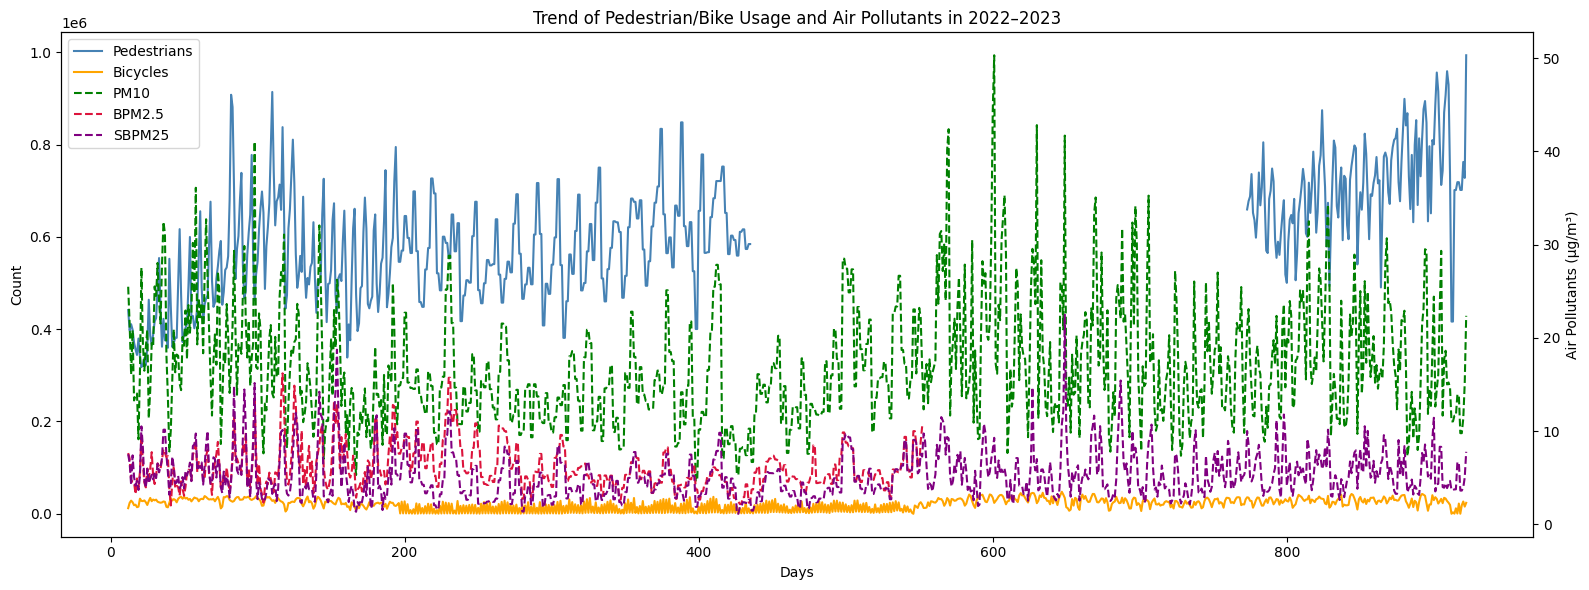

In [44]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Primary axis (Pedestrian and Bicycle counts)
ax1.plot(combined_df.index, combined_df['pedestrian'], label='Pedestrians', color='steelblue')
ax1.plot(combined_df.index, combined_df['bicycle_count'], label='Bicycles', color='orange')
ax1.set_xlabel('Days')
ax1.set_ylabel('Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Secondary axis (Air quality)
ax2 = ax1.twinx()
ax2.plot(combined_df.index, combined_df['pm10'], label='PM10', color='green', linestyle='--')
ax2.plot(combined_df.index, combined_df['bpm2.5'], label='BPM2.5', color='crimson', linestyle='--')
ax2.plot(combined_df.index, combined_df['sbpm25'], label='SBPM25', color='purple', linestyle='--')
ax2.set_ylabel('Air Pollutants (µg/m³)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Trend of Pedestrian/Bike Usage and Air Pollutants in 2022–2023')
plt.tight_layout()
plt.show()

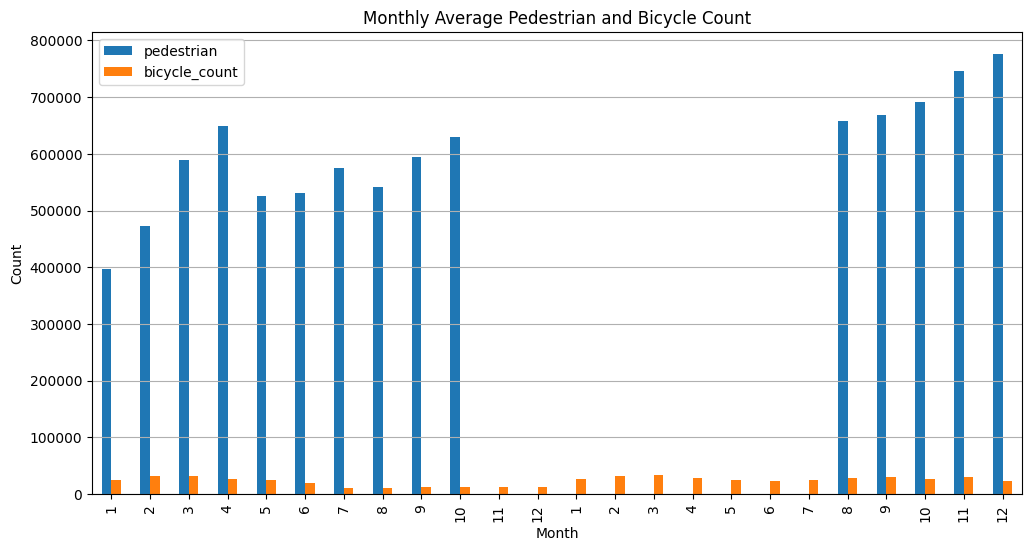

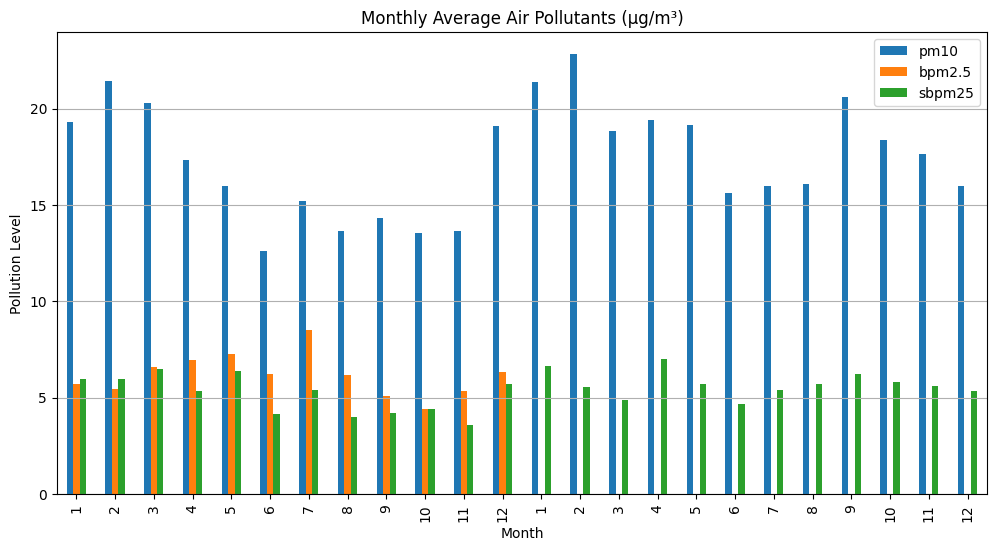

In [42]:
monthly_avg = combined_df.groupby(['year', 'month'])[['pedestrian', 'bicycle_count', 'pm10', 'bpm2.5', 'sbpm25']].mean().reset_index()

monthly_avg.plot(x='month', y=['pedestrian', 'bicycle_count'], kind='bar', figsize=(12, 6))
plt.title("Monthly Average Pedestrian and Bicycle Count")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

monthly_avg.plot(x='month', y=['pm10', 'bpm2.5', 'sbpm25'], kind='bar', figsize=(12, 6))
plt.title("Monthly Average Air Pollutants (µg/m³)")
plt.xlabel("Month")
plt.ylabel("Pollution Level")
plt.grid(axis='y')
plt.show()

               pedestrian  bicycle_count      pm10    bpm2.5    sbpm25
pedestrian       1.000000       0.151082  0.070859  0.043998  0.079754
bicycle_count    0.151082       1.000000  0.420226  0.092300  0.302595
pm10             0.070859       0.420226  1.000000  0.503758  0.717906
bpm2.5           0.043998       0.092300  0.503758  1.000000  0.726480
sbpm25           0.079754       0.302595  0.717906  0.726480  1.000000


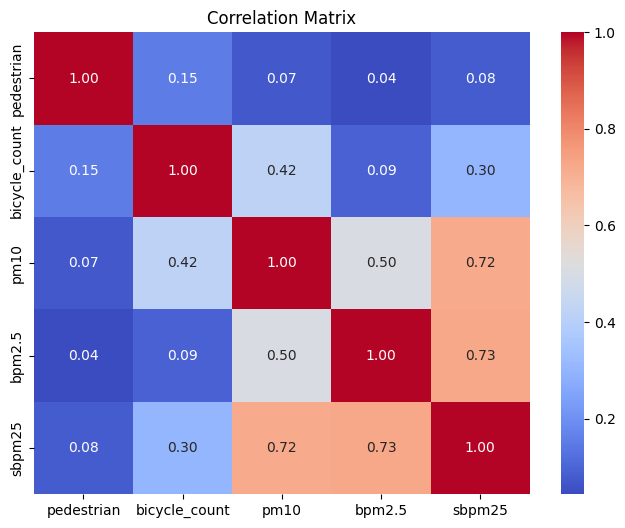

In [43]:
corr = combined_df[['pedestrian', 'bicycle_count', 'pm10', 'bpm2.5', 'sbpm25']].corr()
print(corr)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()